In [8]:
from pynq import Overlay
import pynq.lib.dma

# Load the overlay
overlay = Overlay('../ip_repo/design_1.bit')

overlay.ip_dict

# Load the FIR DMA
dma = overlay.axi_dma_0
dma

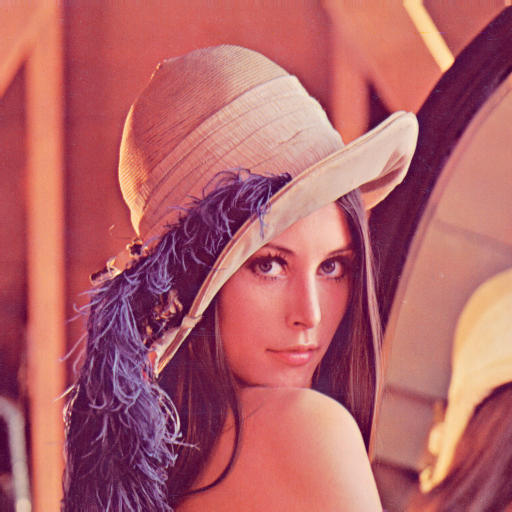

In [9]:
from PIL import Image

arquivo = Image.open("../images/lena.jpg")
arquivo.load()

largura, altura = arquivo.size
display(arquivo)

In [10]:
import numpy as np
from pynq import Xlnk

input_array = np.array(arquivo)

# Allocate buffers for the input and output signals
xlnk = Xlnk()

in_buffer = xlnk.cma_array(shape=(altura, largura, 3), dtype=np.uint8, cacheable=1)
out_buffer = xlnk.cma_array(shape=(altura, largura, 3), dtype=np.uint8, cacheable=1)

Buffer in before receive from DMA


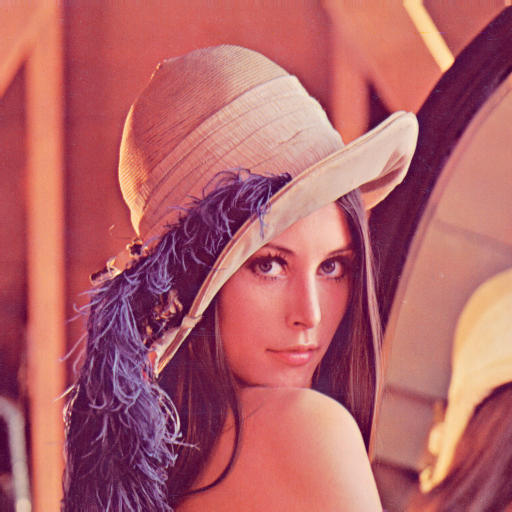

Buffer out before receive from DMA


In [11]:
print('Buffer in before receive from DMA')

in_buffer[0:largura*altura*3] = input_array
buf_image = Image.fromarray(in_buffer)

display(buf_image)

    
print('Buffer out before receive from DMA')

In [12]:
# Trigger the DMA transfer and wait for the result
import time
start_time = time.time()

############
dma.sendchannel.transfer(in_buffer)
dma.recvchannel.transfer(out_buffer)
dma.sendchannel.wait()
dma.recvchannel.wait()
###########
stop_time = time.time()

Hardware output:  0.009144306182861328


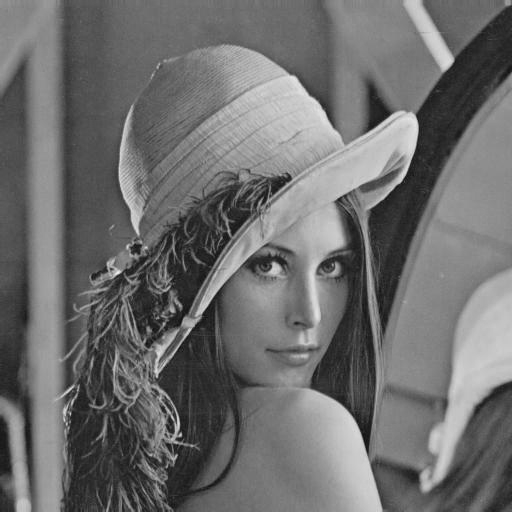

In [14]:
hw_exec_time = stop_time-start_time
print('Hardware output: ',hw_exec_time)


NovaIgagem = Image.new('RGB', (largura, altura))
#setarPixel = NovaIgagem.load()

result = Image.fromarray(out_buffer)
display(result)

# Free the buffers
in_buffer.close()
out_buffer.close()

NovaIgagem = result
NovaIgagem.save('../images/LenaCinza.jpg')
